**DATA CLEANING**

In [ ]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_excel("wine_quality_dataset.xlsx")

In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.2,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,11.2,0.23,0.55,1.7,0.070,15.0,60.0,0.9800,?,0.50,9.0,6


In [ ]:
df.columns = [col.replace(" ", "_") for col in df.columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1603 entries, 0 to 1602
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1603 non-null   float64
 1   volatile_acidity      1603 non-null   float64
 2   citric_acid           1603 non-null   float64
 3   residual_sugar        1603 non-null   object 
 4   chlorides             1602 non-null   float64
 5   free_sulfur_dioxide   1603 non-null   float64
 6   total_sulfur_dioxide  1603 non-null   float64
 7   density               1603 non-null   float64
 8   pH                    1603 non-null   object 
 9   sulphates             1603 non-null   float64
 10  alcohol               1603 non-null   float64
 11  quality               1603 non-null   int64  
dtypes: float64(9), int64(1), object(2)
memory usage: 150.4+ KB


In [ ]:
df.replace('?', pd.NA, inplace=True)
df.dropna(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1601 entries, 0 to 1602
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1601 non-null   float64
 1   volatile_acidity      1601 non-null   float64
 2   citric_acid           1601 non-null   float64
 3   residual_sugar        1601 non-null   object 
 4   chlorides             1601 non-null   float64
 5   free_sulfur_dioxide   1601 non-null   float64
 6   total_sulfur_dioxide  1601 non-null   float64
 7   density               1601 non-null   float64
 8   pH                    1601 non-null   object 
 9   sulphates             1601 non-null   float64
 10  alcohol               1601 non-null   float64
 11  quality               1601 non-null   int64  
dtypes: float64(9), int64(1), object(2)
memory usage: 162.6+ KB


**1. converting object type into float**

In [ ]:
df["residual_sugar"]=pd.to_numeric(df["residual_sugar"],errors='coerce')

In [ ]:
df["pH"]=pd.to_numeric(df["pH"],errors='coerce')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1601 entries, 0 to 1602
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1601 non-null   float64
 1   volatile_acidity      1601 non-null   float64
 2   citric_acid           1601 non-null   float64
 3   residual_sugar        1600 non-null   float64
 4   chlorides             1601 non-null   float64
 5   free_sulfur_dioxide   1601 non-null   float64
 6   total_sulfur_dioxide  1601 non-null   float64
 7   density               1601 non-null   float64
 8   pH                    1601 non-null   float64
 9   sulphates             1601 non-null   float64
 10  alcohol               1601 non-null   float64
 11  quality               1601 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 162.6 KB


# 2. replacing missing values with median

In [ ]:
df.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          1
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
df["residual_sugar"]=df["residual_sugar"].fillna(df['residual_sugar'].median())

In [ ]:
df.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

**3. deleting duplicate rows**

In [ ]:
df.shape

(1601, 12)

In [ ]:
df.duplicated().sum()

242

In [ ]:
df.drop_duplicates(inplace = True)

In [ ]:
df.shape

(1359, 12)

In [ ]:
df = df.reset_index(drop=True)

In [ ]:
num_cols = [col for col in df.columns if (df[col].dtype in ["int64", "float64"]) and (df[col].nunique() > 50)]
num_cols

['fixed_acidity',
 'volatile_acidity',
 'citric_acid',
 'residual_sugar',
 'chlorides',
 'free_sulfur_dioxide',
 'total_sulfur_dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

In [ ]:
target = [col for col in df.columns if df[col].nunique()<10]
target

['quality']

**EDA**

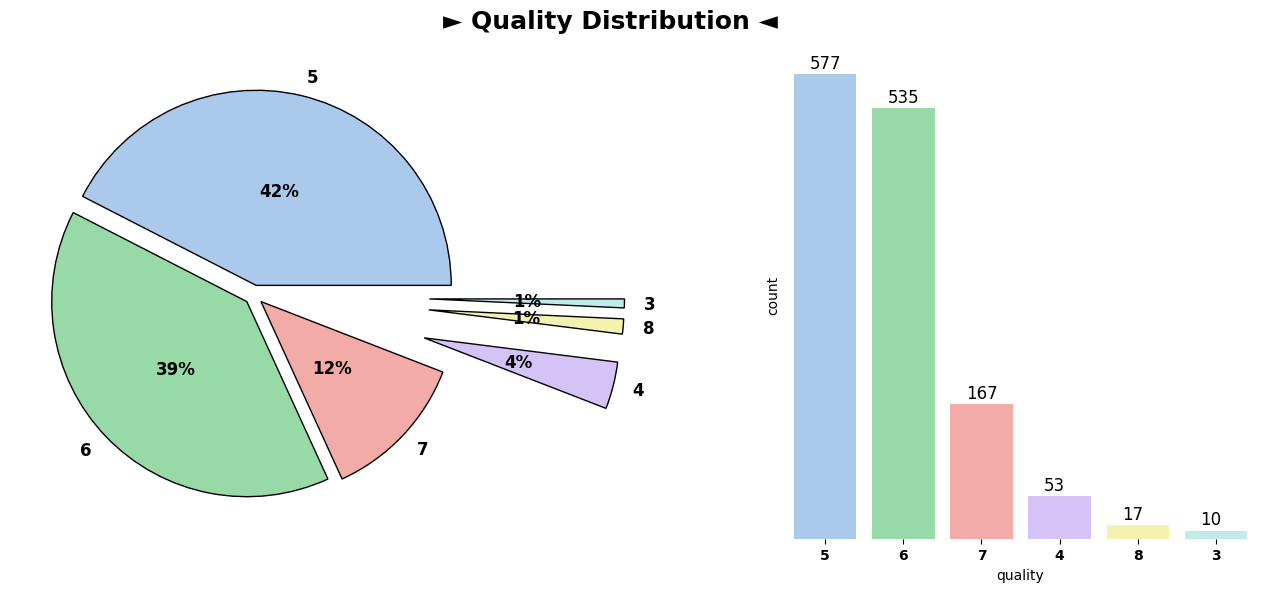

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(15, 6), width_ratios=[2,1])

textprops={'fontsize': 12, 'weight': 'bold',"color": "black"}
ax[0].pie(df["quality"].value_counts().to_list(),
        colors=["#abc9ea","#98daa7","#f3aba8","#d3c3f7","#f3f3af","#c0ebe9"],
        labels=df["quality"].value_counts().index.to_list(),
        autopct='%1.f%%',
        explode=([.05]*3 +[.9,.9,.9]),
        pctdistance=0.5,
        wedgeprops={'linewidth' : 1, 'edgecolor' : 'black'},
        textprops=textprops)

sns.countplot(x = "quality", data=df, palette = "pastel6", order=df["quality"].value_counts().to_dict().keys())
for p, count in enumerate(df["quality"].value_counts().to_dict().values(),0):
    ax[1].text(p-0.2, count + 8, count, color='black', fontsize=12)
plt.setp(ax[1].get_xticklabels(), fontweight="bold")
plt.yticks([])
plt.box(False)
fig.suptitle(x=0.56, t=f'► Quality Distribution ◄', fontsize=18, fontweight='bold')
plt.tight_layout()
plt.show()


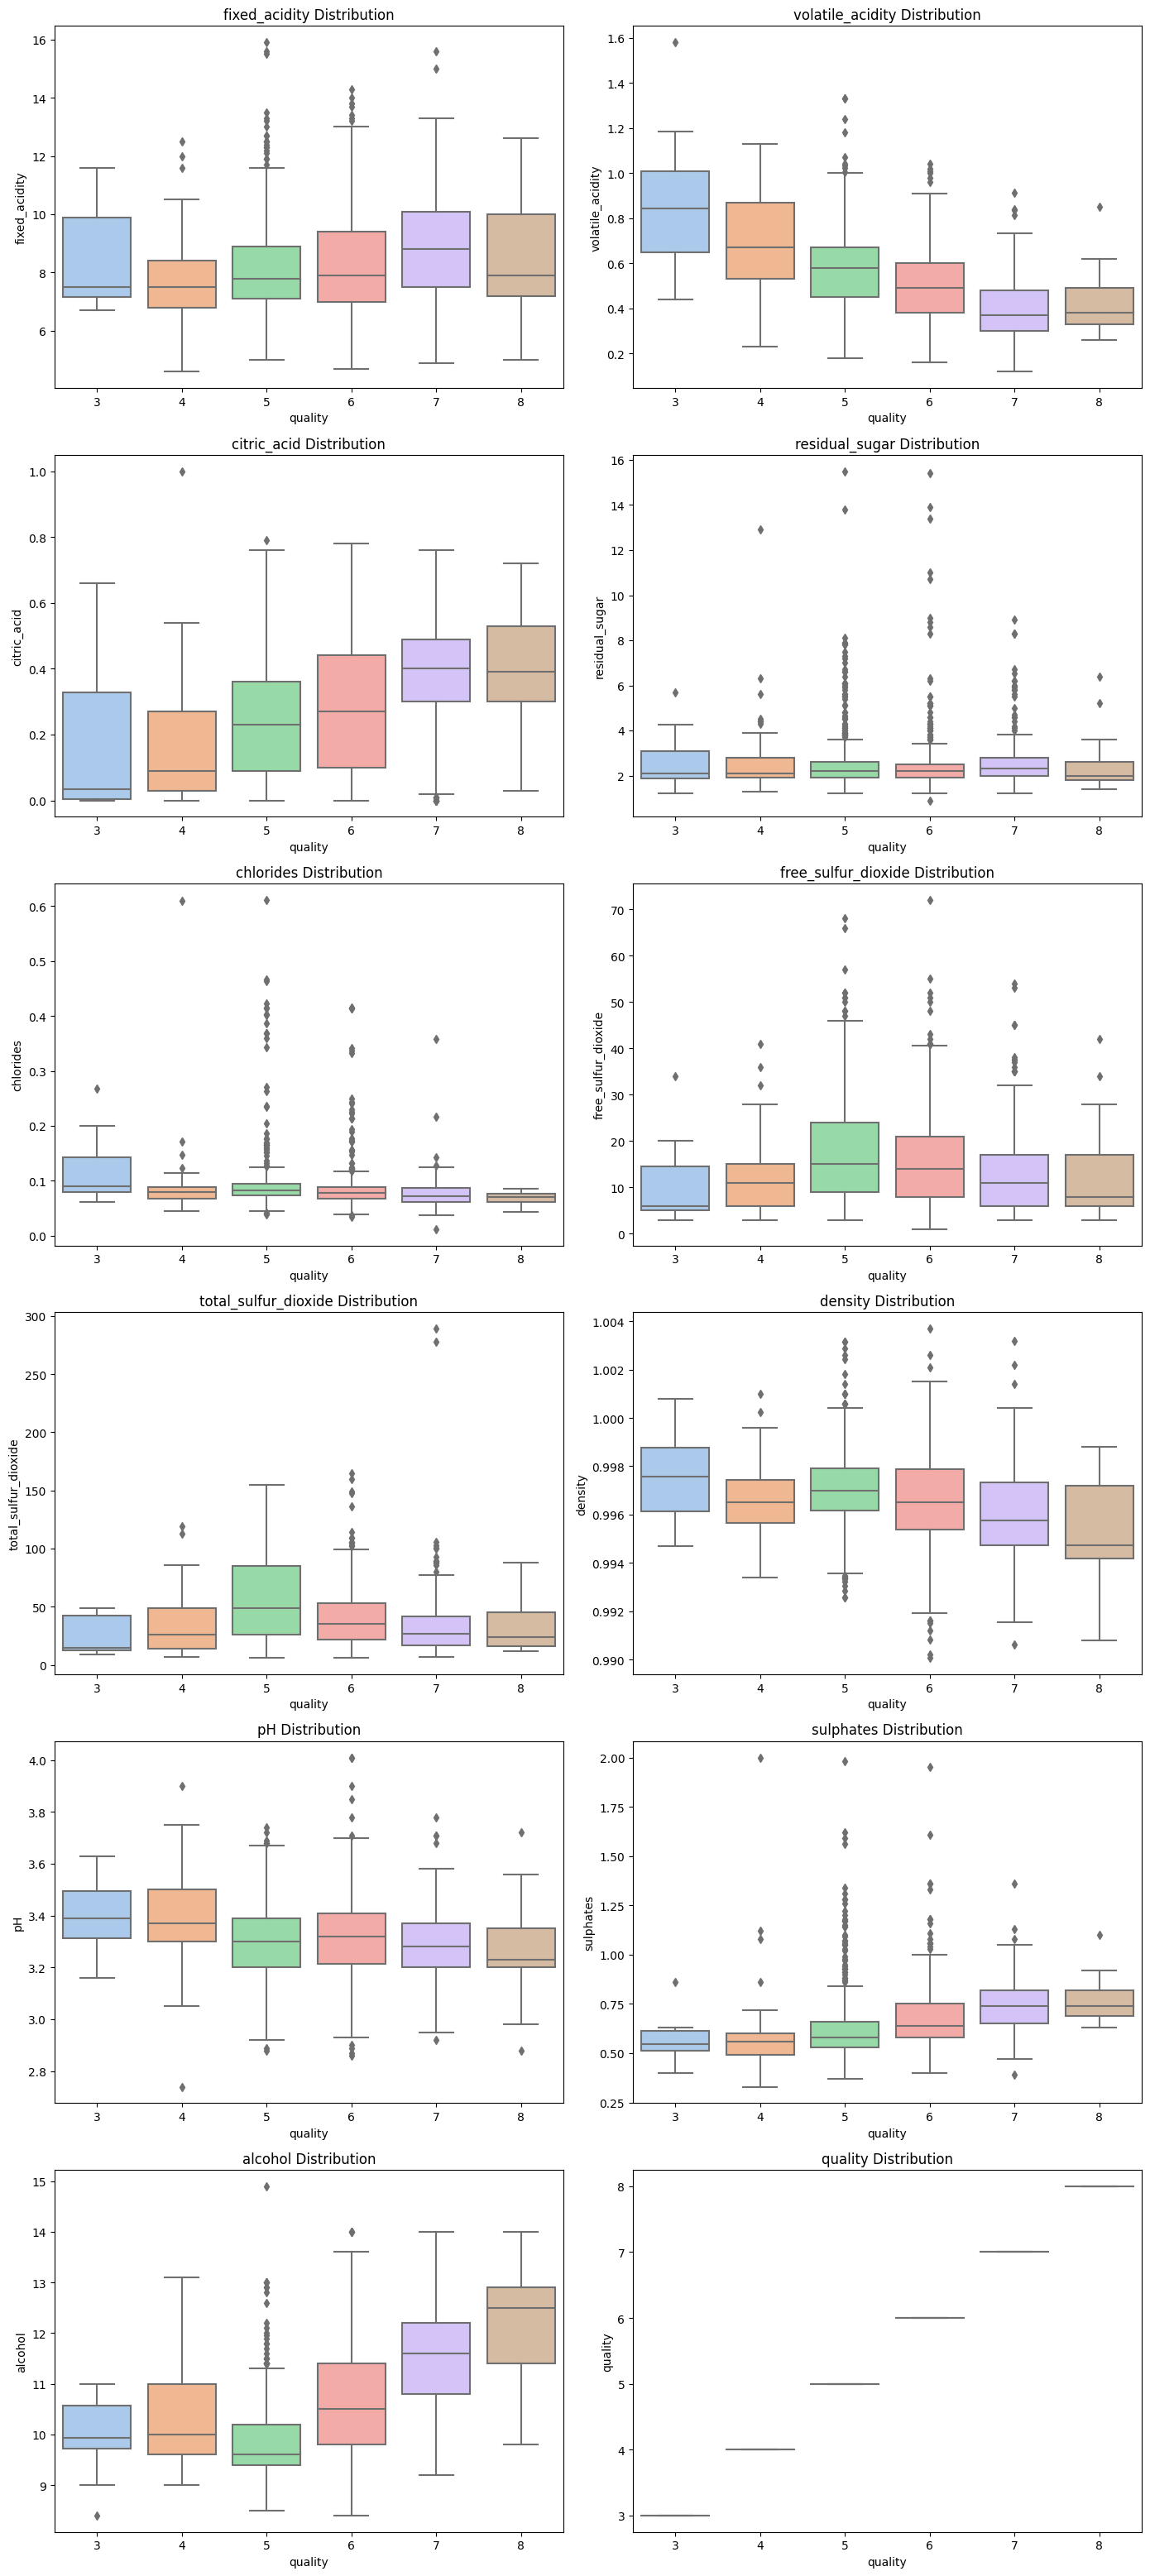

In [ ]:
num_cols = df.select_dtypes(include='number').columns

plt.figure(figsize=(14, len(num_cols)*3))

for idx, column in enumerate(num_cols):
    plt.subplot(len(num_cols)//2 + 1, 2, idx + 1)
    sns.boxplot(x="quality", y=column, data=df, palette="pastel")
    plt.title(f"{column} Distribution")
    plt.tight_layout()

plt.show()

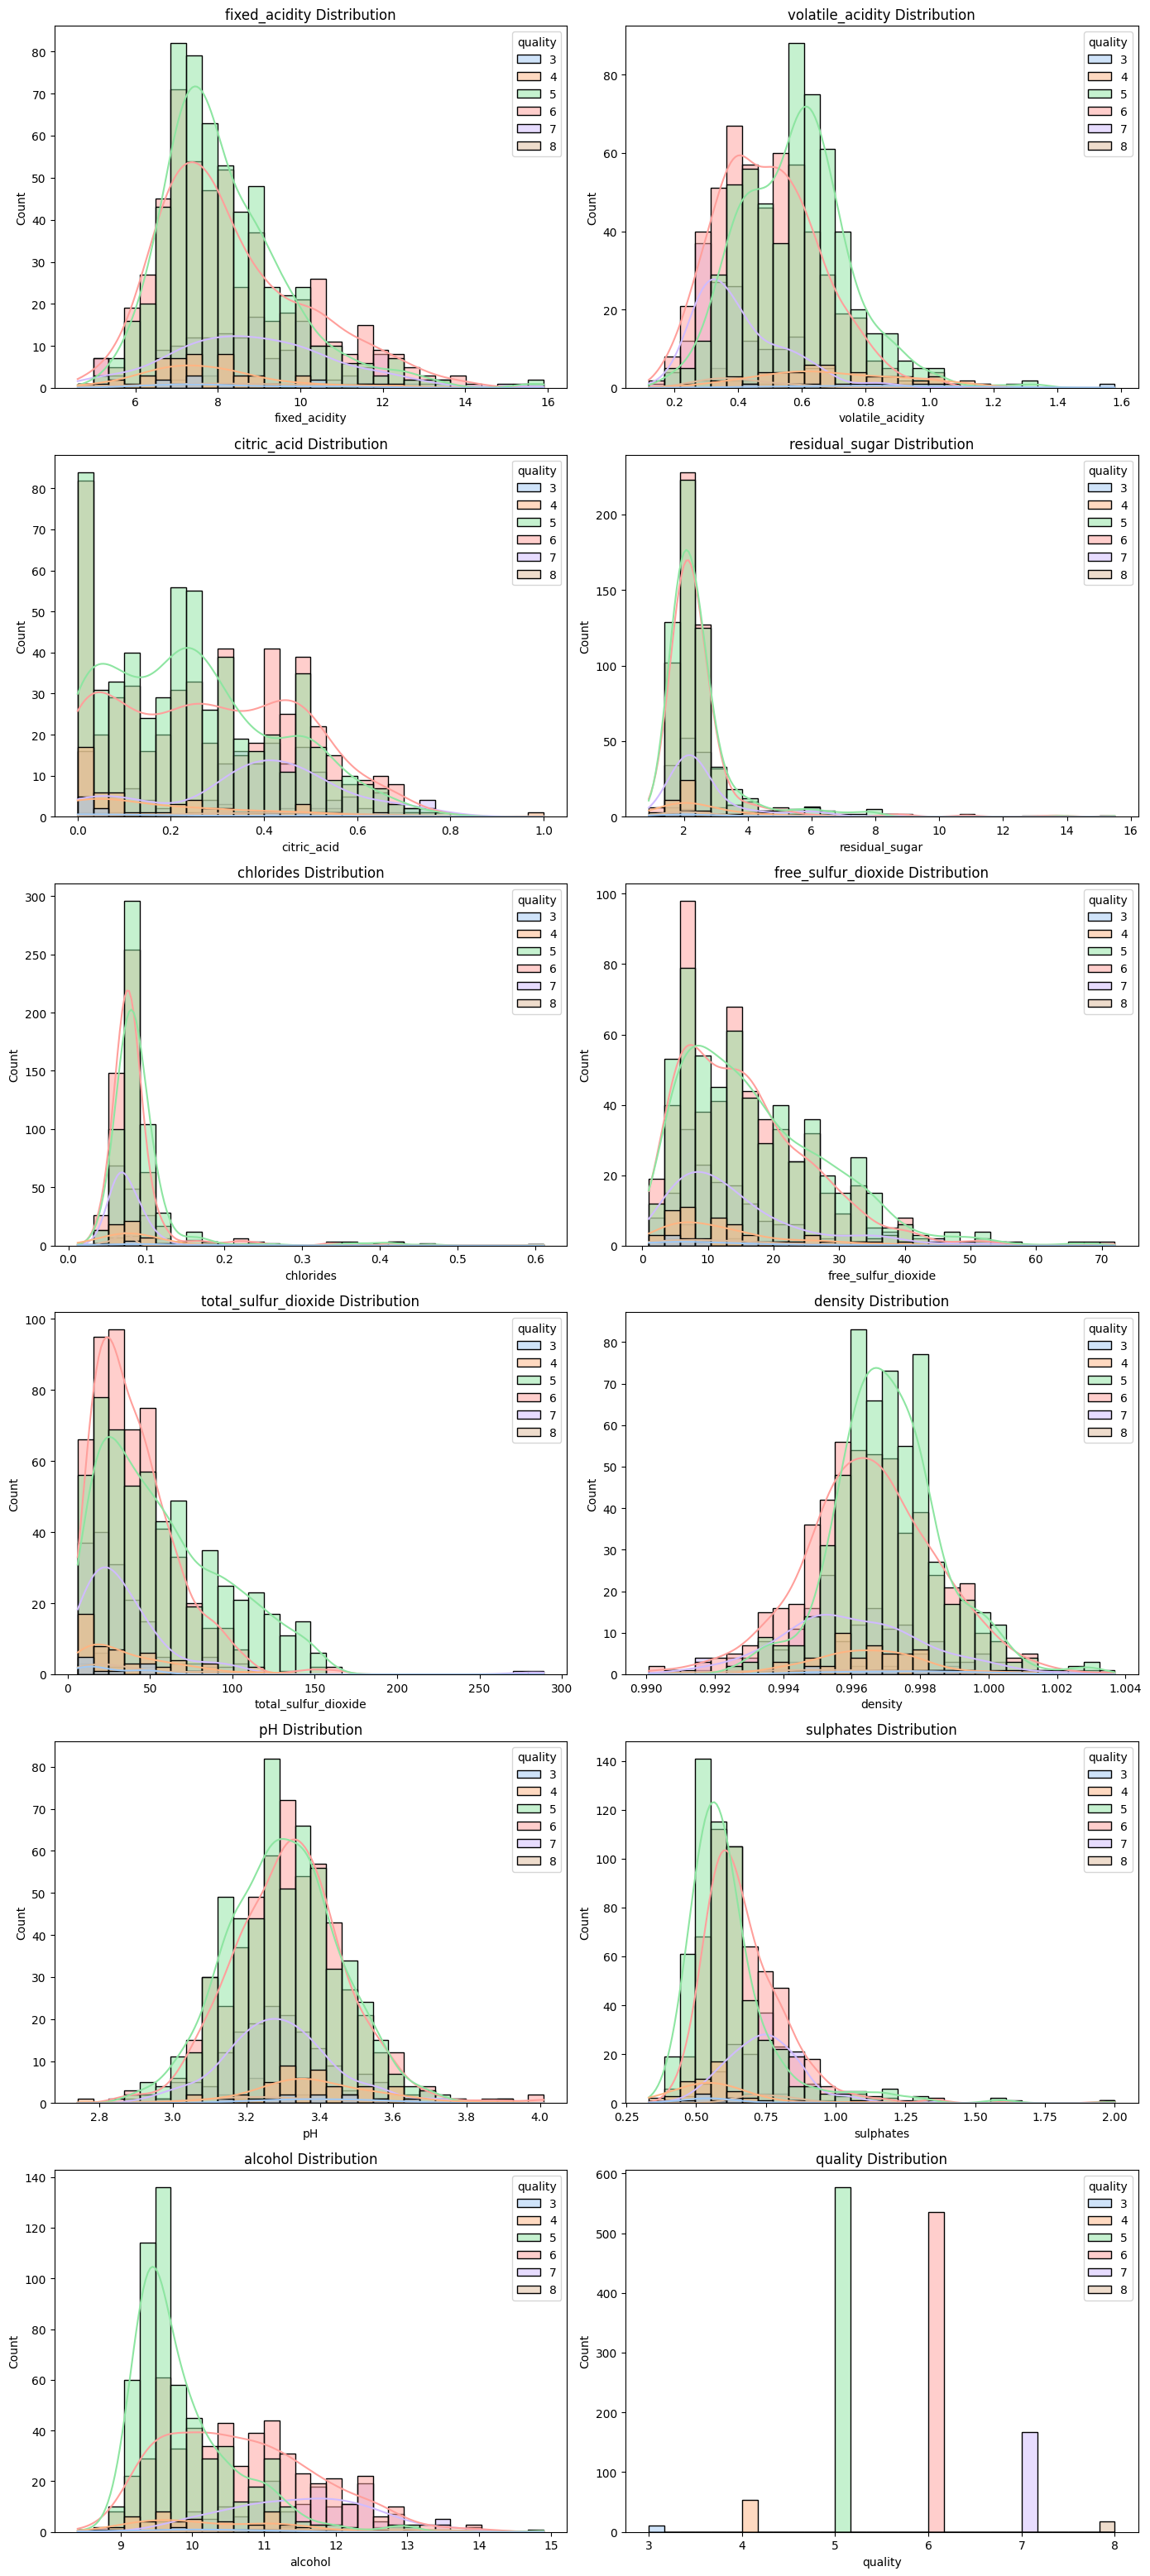

In [ ]:
plt.figure(figsize=(14,len(num_cols)*3))
for idx,column in enumerate(num_cols):
    plt.subplot(len(num_cols)//2+1,2,idx+1)
    sns.histplot(x=column, hue="quality", data=df,bins=30,kde=True, palette="pastel")
    plt.title(f"{column} Distribution")
    plt.tight_layout()

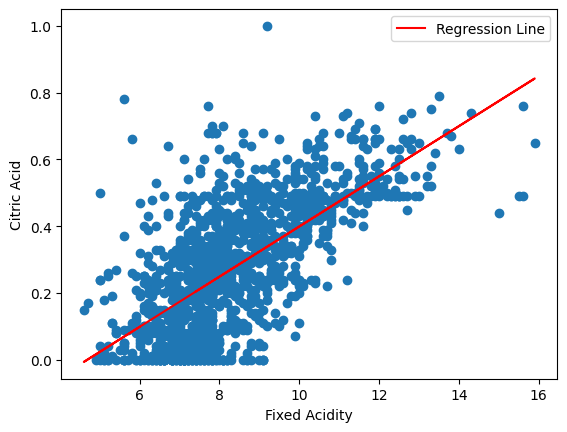

In [ ]:
plt.scatter(df.fixed_acidity, df.citric_acid)
slope, intercept = np.polyfit(df.fixed_acidity, df.citric_acid, 1)
plt.plot(df.fixed_acidity, slope * df.fixed_acidity + intercept, color='red', label='Regression Line')
plt.xlabel('Fixed Acidity')
plt.ylabel('Citric Acid')
plt.legend()

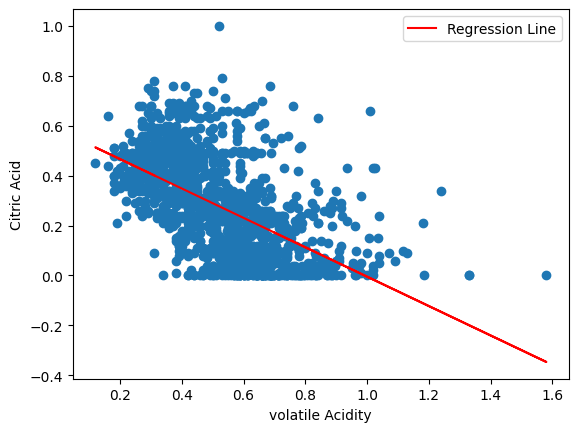

In [ ]:
plt.scatter(df.volatile_acidity, df.citric_acid)
slope, intercept = np.polyfit(df.volatile_acidity, df.citric_acid, 1)
plt.plot(df.volatile_acidity, slope * df.volatile_acidity + intercept, color='red', label='Regression Line')
plt.xlabel('volatile Acidity')
plt.ylabel('Citric Acid')
plt.legend()

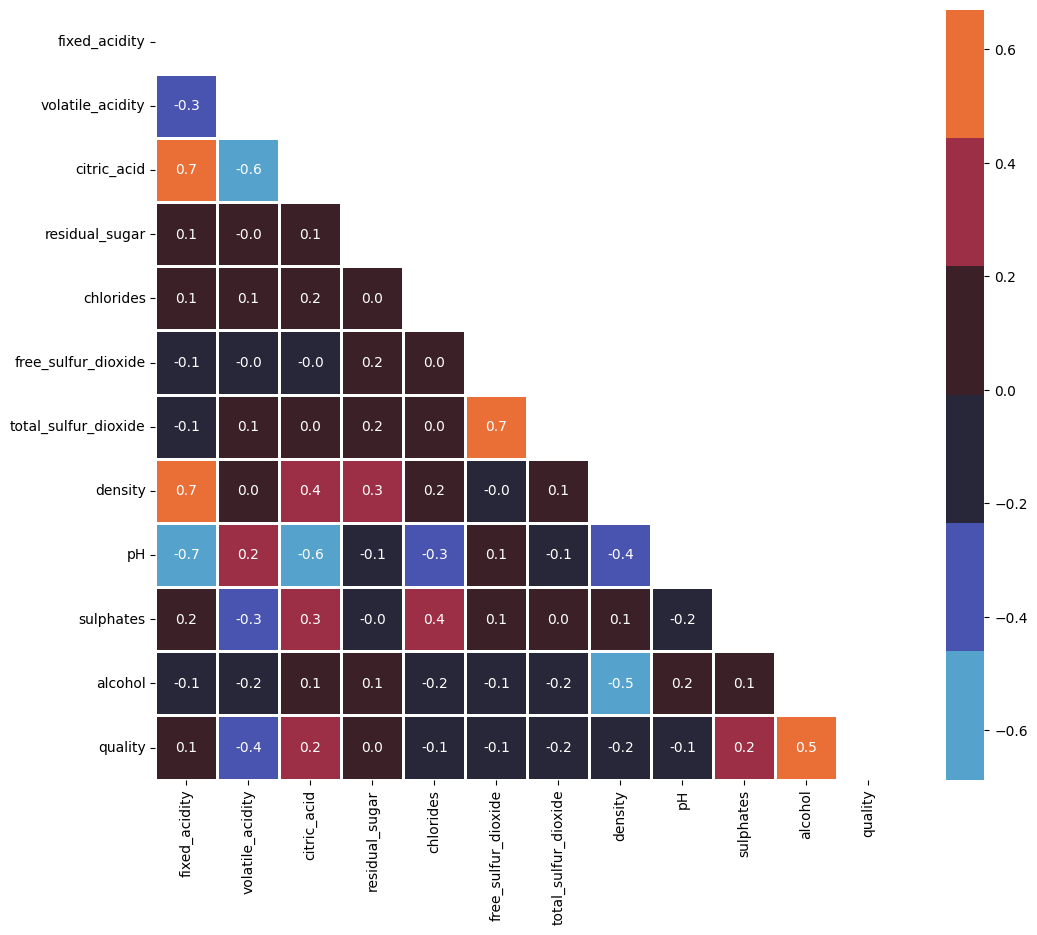

In [ ]:
plt.figure(figsize=(12,10))
corr=df[num_cols].corr(numeric_only=True)
mask = np.triu(np.ones_like(corr))
sns.heatmap(corr, annot=True, fmt=".1f", linewidths=1, mask=mask, cmap=sns.color_palette("icefire"));

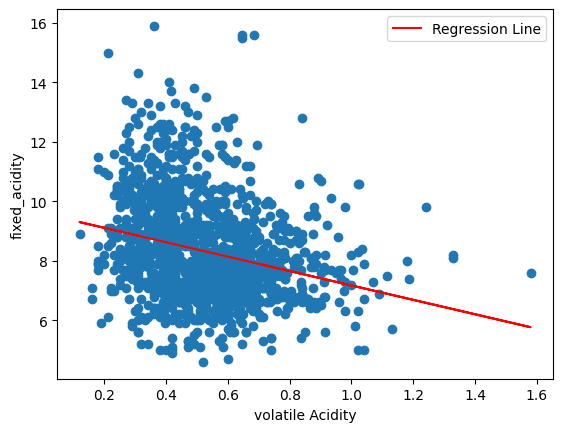

In [ ]:
plt.scatter(df.volatile_acidity, df.fixed_acidity)
slope, intercept = np.polyfit(df.volatile_acidity, df.fixed_acidity, 1)
plt.plot(df.volatile_acidity, slope * df.volatile_acidity + intercept, color='red', label='Regression Line')
plt.xlabel('volatile Acidity')
plt.ylabel('fixed_acidity')
plt.legend()

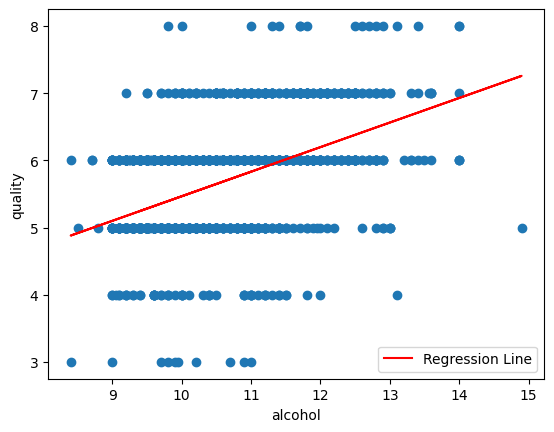

In [ ]:
plt.scatter(df.alcohol, df.quality)
slope, intercept = np.polyfit(df.alcohol, df.quality, 1)
plt.plot(df.alcohol, slope * df.alcohol + intercept, color='red', label='Regression Line')
plt.xlabel('alcohol')
plt.ylabel('quality')
plt.legend()

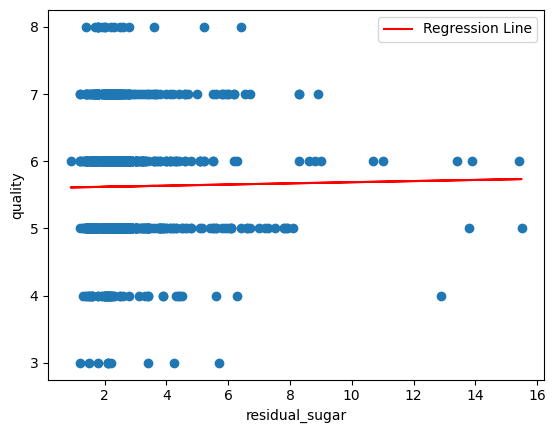

In [ ]:
plt.scatter(df.residual_sugar, df.quality)
slope, intercept = np.polyfit(df.residual_sugar, df.quality, 1)
plt.plot(df.residual_sugar, slope * df.residual_sugar + intercept, color='red', label='Regression Line')
plt.xlabel('residual_sugar')
plt.ylabel('quality')
plt.legend()

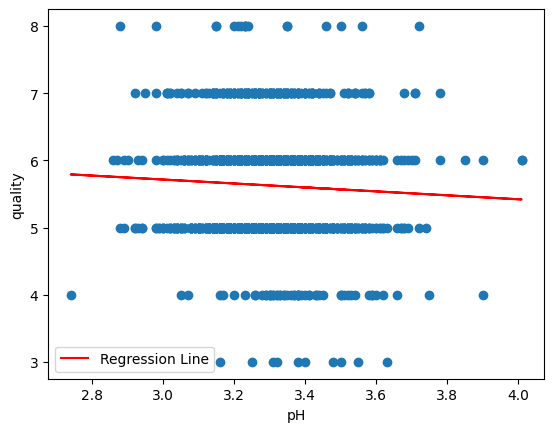

In [ ]:
plt.scatter(df.pH, df.quality)
slope, intercept = np.polyfit(df.pH, df.quality, 1)
plt.plot(df.pH, slope * df.pH + intercept, color='red', label='Regression Line')
plt.xlabel('pH')
plt.ylabel('quality')
plt.legend()

**REGRESSION**

In [ ]:
x = df.iloc[:,[1,9,10]]
x.head()

,volatile_acidity,sulphates,alcohol
0,0.70,0.56,9.4
1,0.88,0.68,9.8
2,0.76,0.65,9.8
3,0.28,0.58,9.8
4,0.66,0.56,9.4


In [ ]:
y = df.iloc[:,11:12]
y.head()

,quality
0,5
1,5
2,5
3,6
4,5


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= .3,random_state=42)

**1. LINEAR REAGRESSION**

In [ ]:
x_train

,volatile_acidity,sulphates,alcohol
328,0.41,0.81,10.8
1043,0.46,0.51,9.4
318,0.46,0.87,10.2
1208,0.23,0.71,12.1
83,0.62,0.53,9.0
...,...,...,...
1095,0.37,0.57,10.5
1130,0.60,0.56,9.8
1294,0.47,0.65,9.6
860,0.32,0.55,10.4


In [ ]:
x_test

,volatile_acidity,sulphates,alcohol
51,0.620,0.53,9.5
1100,0.635,0.75,10.9
1312,0.370,0.81,11.2
514,0.490,0.58,9.0
1074,1.020,0.55,11.2
...,...,...,...
1112,0.610,0.53,9.8
952,0.540,0.72,13.1
398,0.590,0.58,10.3
916,0.320,0.73,11.4


In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:

y_pred = lr.predict(x_test)

In [ ]:
y_pred

array([[5.14175648],
       [5.71084914],
       [6.16822609],
       [5.18762141],
       [5.18130384],
       [6.73444424],
       [5.6200464 ],
       [4.85587108],
       [5.87439091],
       [5.55173426],
       [6.28940525],
       [5.79834396],
       [6.05192355],
       [5.5804487 ],
       [6.18314832],
       [5.2217375 ],
       [5.82152389],
       [5.44088838],
       [5.19370801],
       [5.96040395],
       [5.33061997],
       [6.00941476],
       [5.42596615],
       [4.69498674],
       [5.65699573],
       [5.04804733],
       [5.60019722],
       [5.31653795],
       [5.3063371 ],
       [5.29330511],
       [5.99559759],
       [6.33927909],
       [5.75714794],
       [4.5455932 ],
       [5.51030301],
       [6.21917747],
       [4.86307875],
       [5.93197718],
       [5.34741657],
       [6.19258894],
       [5.27118428],
       [5.59062674],
       [5.93776929],
       [4.79607938],
       [5.41532236],
       [5.34464954],
       [5.01191069],
       [4.388

In [ ]:
y_pred.shape

(408, 1)

In [ ]:
np.random.seed(42)
#evaluation metrics
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')

from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae:.2f}')

from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2:.2f}')

# Convert pandas Series to numpy arrays
y_test_np = y_test.to_numpy()
y_pred_np = y_pred

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_test_np - y_pred_np) / y_test_np)) * 100
print(f"Mean Absolute Percentage Error (MAPE): {mape:.4f}%")

Mean Squared Error: 0.42
Mean Absolute Error: 0.50
R-squared: 0.39
Mean Absolute Percentage Error (MAPE): 9.3601%


**2. RANDOM FOREST**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)
# Create a Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(x_train, y_train)


RandomForestRegressor(random_state=42)

In [ ]:
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Training the regressor
rf_regressor.fit(x_train, y_train)

# Making predictions
predictions = rf_regressor.predict(x_test)

# Calculating metrics for regression
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'R^2 Score: {r2:.2f}')
from sklearn.neighbors import KNeighborsRegressor

# Assuming the last column is the target variable 'quality'

knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(x_train, y_train)

# Predict the values
y_pred = knn.predict(x_test)

# Results
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
r2_score = knn.score(x_test, y_test)
print(f"R2 Score: {r2_score:.2f}")
# Convert pandas Series to numpy arrays
y_test_np = y_test.to_numpy()
y_pred_np = y_pred

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_test_np - y_pred_np) / y_test_np)) * 100
print(f"Mean Absolute Percentage Error (MAPE): {mape:.4f}%")


Mean Squared Error (MSE): 0.43
Mean Absolute Error (MAE): 0.51
R^2 Score: 0.36
Mean Squared Error: 0.46
Mean Absolute Error: 0.51
R2 Score: 0.32
Mean Absolute Percentage Error (MAPE): 9.6176%


**3. KNN**

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
np.random.seed(42)
# Assuming the last column is the target variable 'quality'

knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(x_train, y_train)

# Predict the values
y_pred = knn.predict(x_test)

# Results
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
r2_score = knn.score(x_test, y_test)
print(f"R2 Score: {r2_score:.2f}")

# Convert pandas Series to numpy arrays
y_test_np = y_test.to_numpy()
y_pred_np = y_pred

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_test_np - y_pred_np) / y_test_np)) * 100
print(f"Mean Absolute Percentage Error (MAPE): {mape:.4f}%")


Mean Squared Error: 0.46
Mean Absolute Error: 0.51
R2 Score: 0.32
Mean Absolute Percentage Error (MAPE): 9.6176%


**4. SVR**

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
np.random.seed(42)
# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Create and train the SVM regressor
svm_regressor = SVR(kernel='linear')
svm_regressor.fit(x_train, y_train)
# Prediction
y_pred = svm_regressor.predict(x_test)

# Evaluation Metrics for Regression
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"R^2 Score: {r2:.2f}")
# Convert pandas Series to numpy arrays
y_test_np = y_test.to_numpy()
y_pred_np = y_pred

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_test_np - y_pred_np) / y_test_np)) * 100
print(f"Mean Absolute Percentage Error (MAPE): {mape:.4f}%")



Mean Squared Error: 0.42
Mean Absolute Error: 0.49
R^2 Score: 0.38
Mean Absolute Percentage Error (MAPE): 13.9873%


**5. Decision Tree**

Mean Squared Error: 0.80
Mean Absolute Error: 0.60
R-squared score: -0.18
Mean Absolute Percentage Error (MAPE): 13.9873%


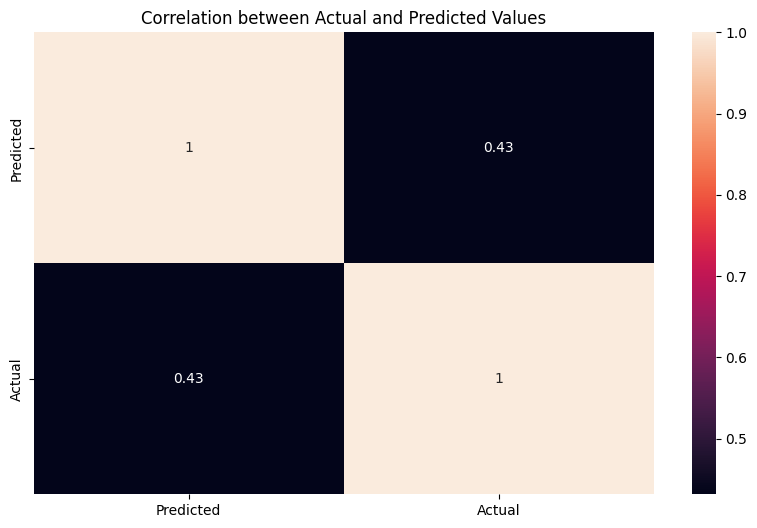

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
np.random.seed(42)

model = DecisionTreeRegressor(random_state=42)
model.fit(x_train, y_train)

# Make predictions
predictions = model.predict(x_test)
# Evaluate the model
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"R-squared score: {r2:.2f}")
# Convert pandas Series to numpy arrays
y_test_np = y_test.to_numpy()
y_pred_np = y_pred

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_test_np - y_pred_np) / y_test_np)) * 100
print(f"Mean Absolute Percentage Error (MAPE): {mape:.4f}%")

# Visualize the results with a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pd.DataFrame(predictions, columns=['Predicted']).join(pd.DataFrame(y_test).reset_index(drop=True).rename(columns={'quality': 'Actual'})).corr(), annot=True)
plt.title('Correlation between Actual and Predicted Values')
plt.show()

**6. Naive Bayes**

Squared Mean Error: 0.51
Absolute Error: 0.44
R-squared: 0.25
Mean Absolute Percentage Error (MAPE): 14.5489%


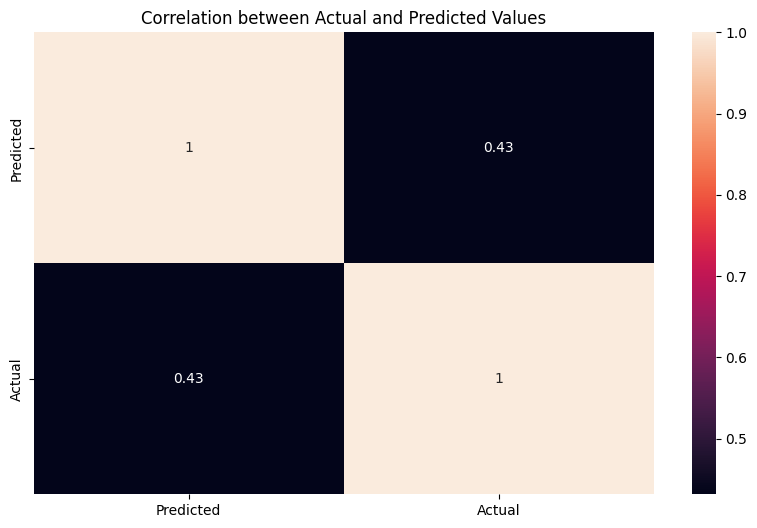

In [ ]:
from sklearn.naive_bayes import GaussianNB
np.random.seed(42)
# Initialize Naive Bayes model
nb = GaussianNB()

# Fit the model
nb.fit(x_train, y_train)

# Predict on the test set
y_pred = nb.predict(x_test)
# Evaluation metrics
sme = mean_squared_error(y_test, y_pred)
sae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
# Convert pandas Series to numpy arrays
y_test_np = y_test.to_numpy()
y_pred_np = y_pred

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_test_np - y_pred_np) / y_test_np)) * 100

print(f"Squared Mean Error: {sme:.2f}")
print(f"Absolute Error: {sae:.2f}")
print(f'R-squared: {r2:.2f}')
print(f"Mean Absolute Percentage Error (MAPE): {mape:.4f}%")


# Visualize the results with a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pd.DataFrame(predictions, columns=['Predicted']).join(pd.DataFrame(y_test).reset_index(drop=True).rename(columns={'quality': 'Actual'})).corr(), annot=True)
plt.title('Correlation between Actual and Predicted Values')
plt.show()

**Boosting**

In [ ]:
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
np.random.seed(42)
# Assuming x_train, x_test, y_train, y_test are your training and testing sets

# AdaBoost
base_model = DecisionTreeRegressor(max_depth=3)
ada_boost_model = AdaBoostRegressor(base_model, n_estimators=50, learning_rate=0.1)
ada_boost_model.fit(x_train, y_train)
ada_boost_predictions = ada_boost_model.predict(x_test)

ada_boost_mse = mean_squared_error(y_test, ada_boost_predictions)
ada_boost_mae = mean_absolute_error(y_test, ada_boost_predictions)
ada_boost_r2 = r2_score(y_test, ada_boost_predictions)
# Convert pandas Series to numpy arrays
y_test_np = y_test.to_numpy()
y_pred_np = y_pred
# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_test_np - y_pred_np) / y_test_np)) * 100

print("AdaBoost Metrics:")
print(f'Mean Squared Error: {ada_boost_mse}')
print(f'Mean Absolute Error: {ada_boost_mae}')
print(f'R-squared: {ada_boost_r2:.2f}')
print(f"Mean Absolute Percentage Error (MAPE): {mape:.4f}%")

# Gradient Boosting
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)
gb_model.fit(x_train, y_train)
gb_predictions = gb_model.predict(x_test)

gb_mse = mean_squared_error(y_test, gb_predictions)
gb_mae = mean_absolute_error(y_test, gb_predictions)
gb_r2 = r2_score(y_test, gb_predictions)
# Convert pandas Series to numpy arrays
y_test_np = y_test.to_numpy()
y_pred_np = y_pred

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_test_np - y_pred_np) / y_test_np)) * 100

print("\nGradient Boosting Metrics:")
print(f'Mean Squared Error: {gb_mse}')
print(f'Mean Absolute Error: {gb_mae}')
print(f'R-squared: {gb_r2:.2f}')
print(f"Mean Absolute Percentage Error (MAPE): {mape:.4f}%")

AdaBoost Metrics:
Mean Squared Error: 0.3914202487487907
Mean Absolute Error: 0.4951612210897349
R-squared: 0.42
Mean Absolute Percentage Error (MAPE): 14.5489%

Gradient Boosting Metrics:
Mean Squared Error: 0.3905012632906704
Mean Absolute Error: 0.48230776630780303
R-squared: 0.42
Mean Absolute Percentage Error (MAPE): 14.5489%


**Neural Network**

In [ ]:
import tensorflow as tf
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
np.random.seed(42)

# Normalize features
scaler = StandardScaler()
x = scaler.fit_transform(x)


# Define the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(x_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
     tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.01)

# Compile the model
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

# Evaluate the model on the test set
y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error on Test Set: {mse:.2f}')

# Compute Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error on Test Set: {mae:.2f}')

# Compute R-squared (R2) value
r2 = r2_score(y_test, y_pred)
print(f'R-squared (R2) on Test Set: {r2:.2f}')

# Convert pandas Series to numpy arrays
y_test_np = y_test.to_numpy()
y_pred_np = y_pred

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_test_np - y_pred_np) / y_test_np)) * 100
print(f"Mean Absolute Percentage Error (MAPE): {mape:.4f}%")

Epoch 1/10
30/30 [==============================] - 1s 13ms/step - loss: 5.0270 - val_loss: 1.0515
Epoch 2/10
30/30 [==============================] - 0s 4ms/step - loss: 1.3021 - val_loss: 0.6875
Epoch 3/10
30/30 [==============================] - 0s 4ms/step - loss: 1.1901 - val_loss: 0.5205
Epoch 4/10
30/30 [==============================] - 0s 4ms/step - loss: 1.0015 - val_loss: 0.7607
Epoch 5/10
30/30 [==============================] - 0s 4ms/step - loss: 0.9969 - val_loss: 0.8681
Epoch 6/10
30/30 [==============================] - 0s 4ms/step - loss: 0.7392 - val_loss: 0.8830
Epoch 7/10
30/30 [==============================] - 0s 5ms/step - loss: 0.8210 - val_loss: 0.4170
Epoch 8/10
30/30 [==============================] - 0s 3ms/step - loss: 0.7339 - val_loss: 0.4895
Epoch 9/10
30/30 [==============================] - 0s 4ms/step - loss: 0.8655 - val_loss: 0.5185
Epoch 10/10
13/13 [==============================] - 0s 2ms/step
Mean Squared Error on Test Set: 0.79
Mean Absolute E